In [7]:
import pandas as pd
houses = pd.read_csv("house_train.csv")
print("First 5 rows:")
print(houses.head())

First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [15]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns  # For fancier visuals

houses = pd.read_csv("house_train.csv")
print("First 5 rows:")
print(houses.head())
print("\nShape:", houses.shape)  # 1460 rows, 81 columns
print("\nMissing values (top 10):")
print(houses.isnull().sum().sort_values(ascending=False).head(10))

First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [17]:
# Drop heavy-missing columns
houses = houses.drop(columns=["PoolQC", "MiscFeature", "Alley", "Fence"])

# Fill missing values for key features
houses["LotFrontage"] = houses["LotFrontage"].fillna(houses["LotFrontage"].median())
print("Missing values in selected features:")
print(houses[["SalePrice", "OverallQual", "GrLivArea", "YearBuilt", "BedroomAbvGr"]].isnull().sum())

Missing values in selected features:
SalePrice       0
OverallQual     0
GrLivArea       0
YearBuilt       0
BedroomAbvGr    0
dtype: int64


Correlation with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
YearBuilt       0.522897
BedroomAbvGr    0.168213
Name: SalePrice, dtype: float64


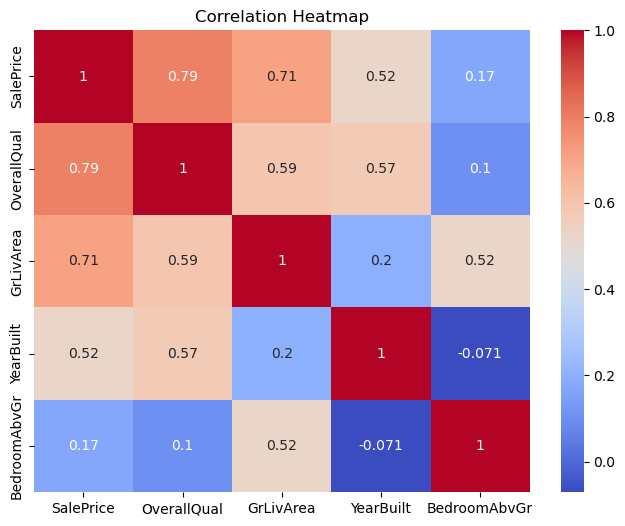

In [19]:
# Correlation matrix
features = ["SalePrice", "OverallQual", "GrLivArea", "YearBuilt", "BedroomAbvGr"]
corr_matrix = houses[features].corr()
print("Correlation with SalePrice:")
print(corr_matrix["SalePrice"])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

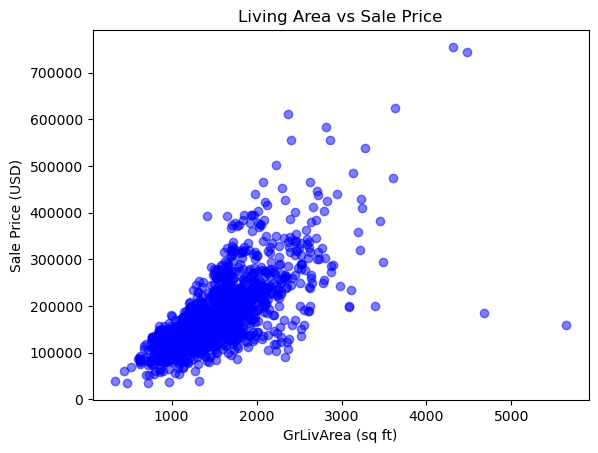

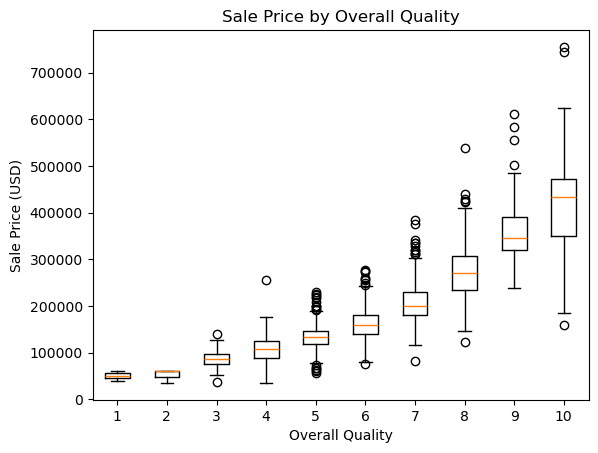

In [21]:
# GrLivArea vs SalePrice
plt.scatter(houses["GrLivArea"], houses["SalePrice"], alpha=0.5, color="blue")
plt.title("Living Area vs Sale Price")
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("Sale Price (USD)")
plt.show()

# OverallQual boxplot
plt.boxplot([houses[houses["OverallQual"] == i]["SalePrice"] for i in range(1, 11)],
            labels=[str(i) for i in range(1, 11)])
plt.title("Sale Price by Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price (USD)")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Select features and target
X = houses[["OverallQual", "GrLivArea", "YearBuilt", "BedroomAbvGr"]].dropna()
y = houses["SalePrice"].loc[X.index]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Coefficients:", dict(zip(X.columns, model.coef_)))
print("Intercept:", model.intercept_)
print("RMSE (error in $):", rmse)

Coefficients: {'OverallQual': 22800.975756289652, 'GrLivArea': 70.60350465791491, 'YearBuilt': 503.3866616998103, 'BedroomAbvGr': -9893.743602780296}
Intercept: -1029537.1368501036
RMSE (error in $): 41931.76817820771


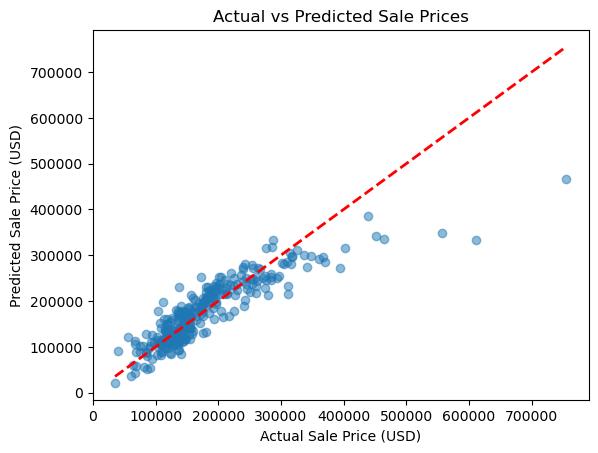

In [25]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Sale Prices")
plt.xlabel("Actual Sale Price (USD)")
plt.ylabel("Predicted Sale Price (USD)")
plt.show()

In [27]:
print(f"Median SalePrice: ${houses['SalePrice'].median():,.0f}")
print(f"Model RMSE: ${rmse:,.0f}")
print("Key insight: Quality and living area dominate price prediction.")

Median SalePrice: $163,000
Model RMSE: $41,932
Key insight: Quality and living area dominate price prediction.
